<a href="https://colab.research.google.com/github/karan2261/AGNews-Text-Classifier-FFNN-RNN-and-BiLSTM/blob/main/AG_News_Text_Classifier_FFNN%2C_RNN_and_BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re

# Loading the dataset
from datasets import load_dataset
dataset = load_dataset('ag_news')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
# Convert the datasets to pandas DataFrames
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

# **Dataset Overview**

---

* AG News (AG’s News Corpus) is a subdataset of AG's corpus of news articles constructed by assembling titles and description fields of articles from the 4 largest classes (“World”, “Sports”, “Business”, “Sci/Tech”) of AG’s Corpus. The AG News contains 30,000 training and 1,900 test samples per class.

* The AG's news topic classification dataset is constructed by choosing 4 largest classes from the original corpus. Each class contains 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000 and testing 7,600.


* Source: AG’s corpus of news articles on the web.
* Content: News articles categorized into World, Sports, Business, and Science/Technology.
* Labels: Four class labels representing different news categories.
* Scope: Covers a broad range of current events and topics.
* Size: Typically contains thousands of articles.
* Language: Primarily in English.


resource : https://labelbox.com/datasets/ag-news/

resource : https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset

resource : https://www.geeksforgeeks.org/best-nlp-datasets/#ag-news-corpus

# Visualizations

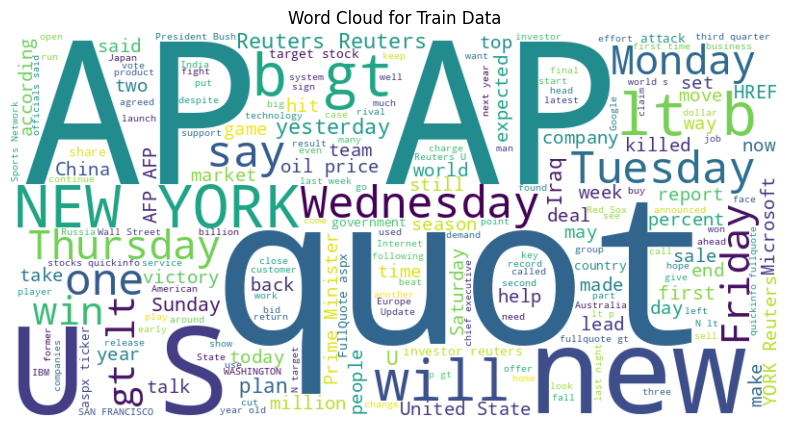

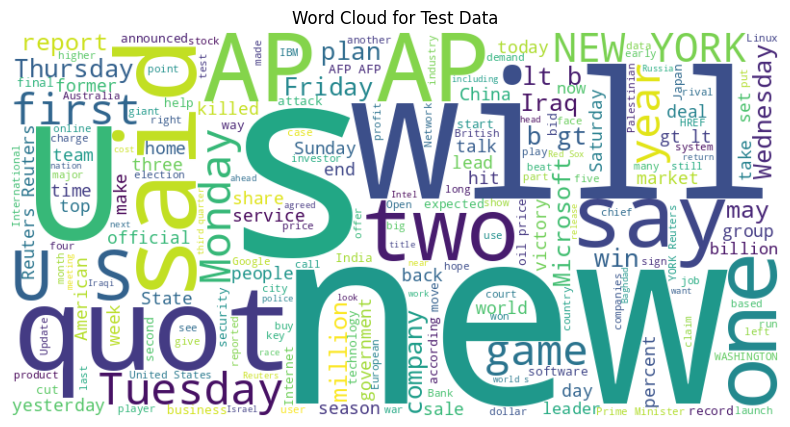

In [ ]:
# Word Cloud for train and test data
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(data, title):
    text = ' '.join(data['text'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_word_cloud(train_df, 'Word Cloud for Train Data')
plot_word_cloud(test_df, 'Word Cloud for Test Data')

<ipython-input-18-b5352fc9b693>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='category', palette='viridis')


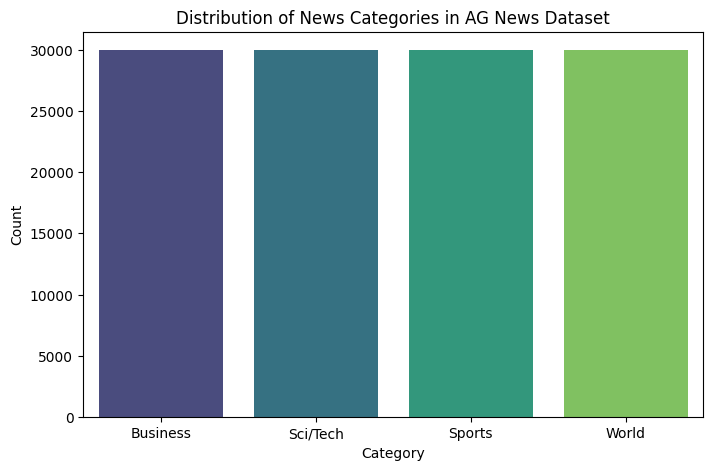

In [ ]:
import seaborn as sns
from collections import Counter

# Map the numerical labels to their category names
label_mapping = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}
train_df['category'] = train_df['label'].map(label_mapping)

# Label Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='category', palette='viridis')
plt.title('Distribution of News Categories in AG News Dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      120000 non-null  object
 1   label     120000 non-null  int64 
 2   category  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7600 non-null   object
 1   label   7600 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.9+ KB


In [ ]:
train_df.head()

,text,label,category
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Business
4,"Oil prices soar to all-time record, posing new...",2,Business


In [ ]:
test_df.head()

,text,label
0,Fears for T N pension after talks Unions repre...,2
1,The Race is On: Second Private Team Sets Launc...,3
2,Ky. Company Wins Grant to Study Peptides (AP) ...,3
3,Prediction Unit Helps Forecast Wildfires (AP) ...,3
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3


# Cleaning and preprocessing the text data


In [ ]:
# Loading large model from spacy
!python -m spacy download en_core_web_lg

import spacy
nlp = spacy.load("en_core_web_lg")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk_stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Text Preprocessing
def clean_text(text):

    # 1. Lowercase the text
    text = text.lower()
    # 2. Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    # 3. Remove hashtags (#)
    text = re.sub(r'#', '', text)
    # 4. Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # 5. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    # 6. Tokenize the text using spacy
    doc = nlp(text)
    # 7. Remove stopwords (both from spacy and nltk) and lemmatize the text
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.text not in nltk_stop_words]
    # 8. Join the tokens back into a cleaned string
    cleaned_text = ' '.join(tokens)
    # 9. Return the cleaned and lemmatized text
    return cleaned_text

In [ ]:
print(train_df.columns)
print(test_df.columns)

Index(['text', 'label', 'category'], dtype='object')
Index(['text', 'label'], dtype='object')


In [ ]:
# Apply text cleaning to the training and test data
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

# Visualizations after cleaning the data

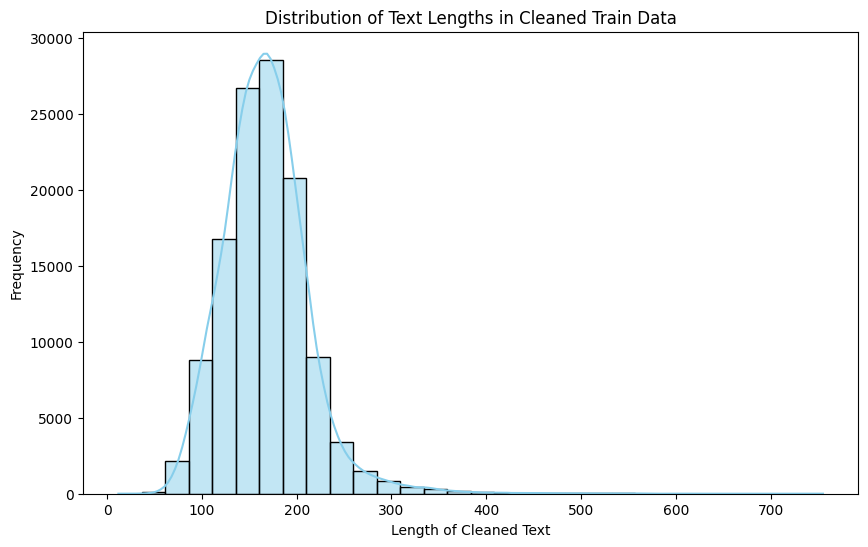

In [ ]:
# Visualization for calculating the length of cleaned text
train_df['text_length'] = train_df['cleaned_text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Text Lengths in Cleaned Train Data')
plt.xlabel('Length of Cleaned Text')
plt.ylabel('Frequency')
plt.show()

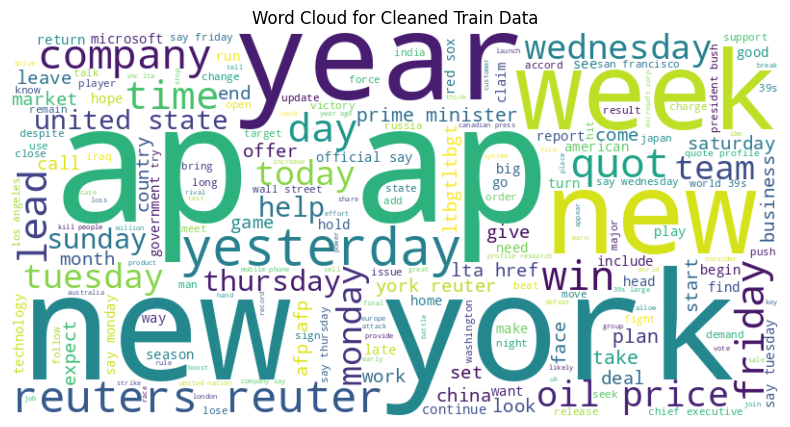

In [ ]:
# Word clouds for cleaned text
def plot_word_cloud_cleaned(data, title):
    text = ' '.join(data['cleaned_text'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_word_cloud_cleaned(train_df, 'Word Cloud for Cleaned Train Data')

<ipython-input-17-73aa54efaf2c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


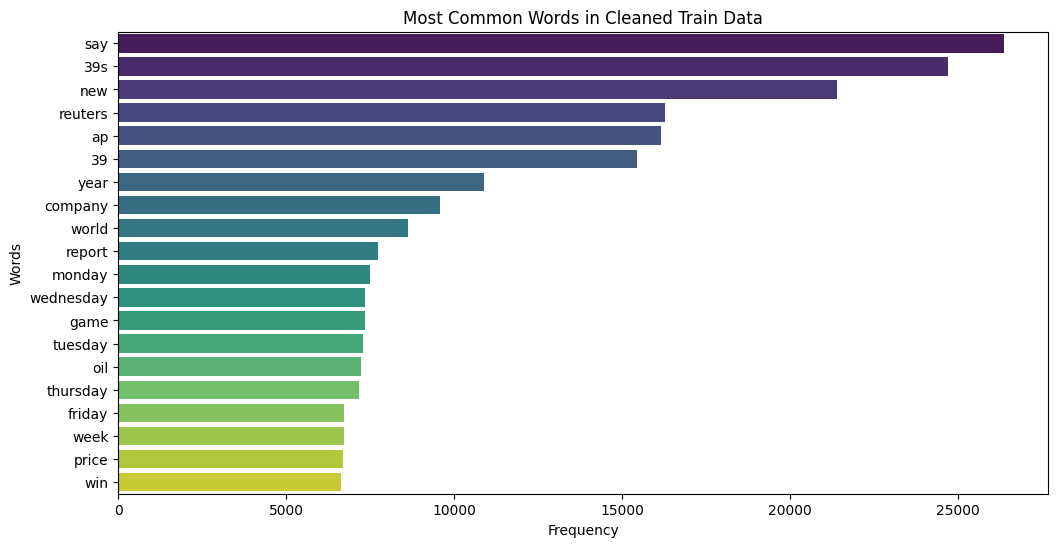

In [ ]:
# Plotting the most common words

# Split the cleaned text into words
all_words = ' '.join(train_df['cleaned_text']).split()
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Most Common Words in Cleaned Train Data')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Neural Network

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data Preparation

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, SimpleRNN, LSTM, Bidirectional

# Tokenization and padding
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(train_df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(train_df['cleaned_text'])
word_index = tokenizer.word_index

# Pad sequences
data_padded = pad_sequences(sequences, maxlen=100, padding='post')

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(train_df['label'])
labels = tf.keras.utils.to_categorical(labels, num_classes=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_padded, labels, test_size=0.2, random_state=42)

## 1. Feedforward Neural Network (FFNN)


In [ ]:
# FFNN Model
ffnn_model = Sequential()
ffnn_model.add(Embedding(input_dim=1000, output_dim=128, input_length=100))
ffnn_model.add(Flatten())
ffnn_model.add(Dense(128, activation='relu'))
ffnn_model.add(Dense(64, activation='relu'))
ffnn_model.add(Dense(4, activation='softmax'))

In [ ]:
# Compile and train with SGD
ffnn_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
ffnn_history_sgd = ffnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)
test_loss_sgd, test_accuracy_sgd = ffnn_model.evaluate(X_test, y_test)
print(f"FFNN with SGD - Test Accuracy: {test_accuracy_sgd:.4f}\n")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8535 - loss: 0.4219 - val_accuracy: 0.8488 - val_loss: 0.4364
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.8588 - loss: 0.4100 - val_accuracy: 0.8520 - val_loss: 0.4270
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.8633 - loss: 0.3941 - val_accuracy: 0.8502 - val_loss: 0.4276
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.8670 - loss: 0.3871 - val_accuracy: 0.8570 - val_loss: 0.4155
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.8672 - loss: 0.3803 - val_accuracy: 0.8548 - val_loss: 0.4177
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.8724 - loss: 0.3695 - val_accuracy: 0.8572 - val_loss: 0.4067
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.8750 - loss: 0.3602 - val_accuracy: 0.8592 - val_loss: 0.4056
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.8754 -

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Compile and train with Adam
ffnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ffnn_history_adam = ffnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[early_stopping])
test_loss_adam, test_accuracy_adam = ffnn_model.evaluate(X_test, y_test)
print(f"FFNN with Adam - Test Accuracy: {test_accuracy_adam:.4f}\n")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8568 - loss: 0.4030 - val_accuracy: 0.8631 - val_loss: 0.3816
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8894 - loss: 0.3022 - val_accuracy: 0.8607 - val_loss: 0.4012
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9107 - loss: 0.2410 - val_accuracy: 0.8609 - val_loss: 0.4272
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9311 - loss: 0.1838 - val_accuracy: 0.8541 - val_loss: 0.4862
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8545 - loss: 0.4885
FFNN with Adam - Test Accuracy: 0.8541



In [ ]:
# Compile and train with Adagrad
ffnn_model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
ffnn_history_adagrad = ffnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[early_stopping])
test_loss_adagrad, test_accuracy_adagrad = ffnn_model.evaluate(X_test, y_test)
print(f"FFNN with Adagrad - Test Accuracy: {test_accuracy_adagrad:.4f}\n")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.9591 - loss: 0.1160 - val_accuracy: 0.8564 - val_loss: 0.5206
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.9589 - loss: 0.1122 - val_accuracy: 0.8574 - val_loss: 0.5305
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9605 - loss: 0.1085 - val_accuracy: 0.8575 - val_loss: 0.5358
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8587 - loss: 0.5366
FFNN with Adagrad - Test Accuracy: 0.8575



## 2. RNN Model

In [ ]:
# RNN Model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=1000, output_dim=128, input_length=100))
rnn_model.add(SimpleRNN(128))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(4, activation='softmax'))

In [ ]:
# Compile and train with SGD
rnn_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[early_stopping])
test_loss_rnn_sgd, test_accuracy_rnn_sgd = rnn_model.evaluate(X_test, y_test)
print(f"RNN with SGD - Test Accuracy: {test_accuracy_rnn_sgd:.4f}\n")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.2576 - loss: 1.3859 - val_accuracy: 0.2606 - val_loss: 1.3858
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.2556 - loss: 1.3857 - val_accuracy: 0.2606 - val_loss: 1.3857
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.2549 - loss: 1.3859 - val_accuracy: 0.2607 - val_loss: 1.3857
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2594 - loss: 1.3858
RNN with SGD - Test Accuracy: 0.2607



In [ ]:
# Compile and train with Adam
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_history_adam = rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[early_stopping])
test_loss_rnn_adam, test_accuracy_rnn_adam = rnn_model.evaluate(X_test, y_test)
print(f"RNN with Adam - Test Accuracy: {test_accuracy_rnn_adam:.4f}\n")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.2489 - loss: 1.3864 - val_accuracy: 0.2463 - val_loss: 1.3865
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.2513 - loss: 1.3864 - val_accuracy: 0.2463 - val_loss: 1.3864
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.2472 - loss: 1.3864 - val_accuracy: 0.2531 - val_loss: 1.3863
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2521 - loss: 1.3862
RNN with Adam - Test Accuracy: 0.2531



In [ ]:
# Compile and train with Adagrad
rnn_model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_history_adagrad = rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[early_stopping])
test_loss_rnn_adagrad, test_accuracy_rnn_adagrad = rnn_model.evaluate(X_test, y_test)
print(f"RNN with Adagrad - Test Accuracy: {test_accuracy_rnn_adagrad:.4f}\n")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.2494 - loss: 1.3863 - val_accuracy: 0.2531 - val_loss: 1.3863
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.2497 - loss: 1.3863 - val_accuracy: 0.2531 - val_loss: 1.3863
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.2500 - loss: 1.3863 - val_accuracy: 0.2531 - val_loss: 1.3863
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2521 - loss: 1.3863
RNN with Adagrad - Test Accuracy: 0.2531



## 3. Bidirectional Long Short-Term Memory (LSTM)

In [ ]:
# Bidirectional LSTM Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Embedding(input_dim=1000, output_dim=128, input_length=100))
bi_lstm_model.add(Bidirectional(LSTM(128)))
bi_lstm_model.add(Dense(4, activation='softmax'))

In [ ]:
# Compile and train with SGD
bi_lstm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
bi_lstm_history_sgd = bi_lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[early_stopping])
test_loss_bilstm_sgd, test_accuracy_bilstm_sgd = bi_lstm_model.evaluate(X_test, y_test)
print(f"Bidirectional LSTM with SGD - Test Accuracy: {test_accuracy_bilstm_sgd:.4f}\n")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.2570 - loss: 1.3859 - val_accuracy: 0.3589 - val_loss: 1.3829
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3337 - loss: 1.3813 - val_accuracy: 0.3619 - val_loss: 1.3740
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3764 - loss: 1.3635 - val_accuracy: 0.3699 - val_loss: 1.3259
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3716 - loss: 1.3253
Bidirectional LSTM with SGD - Test Accuracy: 0.3699



In [ ]:
# Compile and train with Adam
bi_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
bi_lstm_history_adam = bi_lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,  batch_size=64, callbacks=[early_stopping])
test_loss_bilstm_adam, test_accuracy_bilstm_adam = bi_lstm_model.evaluate(X_test, y_test)
print(f"Bidirectional LSTM with Adam - Test Accuracy: {test_accuracy_bilstm_adam:.4f}\n")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8031 - loss: 0.5276 - val_accuracy: 0.8679 - val_loss: 0.3706
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8778 - loss: 0.3456 - val_accuracy: 0.8717 - val_loss: 0.3600
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8808 - loss: 0.3284 - val_accuracy: 0.8748 - val_loss: 0.3470
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8753 - loss: 0.3473
Bidirectional LSTM with Adam - Test Accuracy: 0.8748



In [ ]:
# Compile and train with Adagrad
bi_lstm_model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
bi_lstm_history_adagrad = bi_lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,  batch_size=64, callbacks=[early_stopping])
test_loss_bilstm_adagrad, test_accuracy_bilstm_adagrad = bi_lstm_model.evaluate(X_test, y_test)
print(f"Bidirectional LSTM with Adagrad - Test Accuracy: {test_accuracy_bilstm_adagrad:.4f}\n")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8925 - loss: 0.2967 - val_accuracy: 0.8757 - val_loss: 0.3444
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8941 - loss: 0.2924 - val_accuracy: 0.8760 - val_loss: 0.3439
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8930 - loss: 0.2924 - val_accuracy: 0.8758 - val_loss: 0.3437
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8755 - loss: 0.3442
Bidirectional LSTM with Adagrad - Test Accuracy: 0.8758



In [ ]:
# Initialize a DataFrame to store results
results = pd.DataFrame(columns=["Model", "Optimizer", "Accuracy", "Loss"])

# Add results for FFNN
results = pd.concat([results, pd.DataFrame([{"Model": "FFNN", "Optimizer": "SGD", "Accuracy": test_accuracy_sgd, "Loss": test_loss_sgd}])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([{"Model": "FFNN", "Optimizer": "Adam", "Accuracy": test_accuracy_adam, "Loss": test_loss_adam}])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([{"Model": "FFNN", "Optimizer": "Adagrad", "Accuracy": test_accuracy_adagrad, "Loss": test_loss_adagrad}])], ignore_index=True)

# Add results for RNN
results = pd.concat([results, pd.DataFrame([{"Model": "RNN", "Optimizer": "SGD", "Accuracy": test_accuracy_rnn_sgd, "Loss": test_loss_rnn_sgd}])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([{"Model": "RNN", "Optimizer": "Adam", "Accuracy": test_accuracy_rnn_adam, "Loss": test_loss_rnn_adam}])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([{"Model": "RNN", "Optimizer": "Adagrad", "Accuracy": test_accuracy_rnn_adagrad, "Loss": test_loss_rnn_adagrad}])], ignore_index=True)

# Add results for Bidirectional LSTM
results = pd.concat([results, pd.DataFrame([{"Model": "Bidirectional LSTM", "Optimizer": "SGD", "Accuracy": test_accuracy_bilstm_sgd, "Loss": test_loss_bilstm_sgd}])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([{"Model": "Bidirectional LSTM", "Optimizer": "Adam", "Accuracy": test_accuracy_bilstm_adam, "Loss": test_loss_bilstm_adam}])], ignore_index=True)
results = pd.concat([results, pd.DataFrame([{"Model": "Bidirectional LSTM", "Optimizer": "Adagrad", "Accuracy": test_accuracy_bilstm_adagrad, "Loss": test_loss_bilstm_adagrad}])], ignore_index=True)


# Display the results DataFrame
print(results)

                Model Optimizer  Accuracy      Loss
0                FFNN       SGD  0.382750  1.312046
1                FFNN      Adam  0.878625  0.357241
2                FFNN   Adagrad  0.880167  0.357860
3                 RNN       SGD  0.260667  1.385727
4                 RNN      Adam  0.253125  1.386275
5                 RNN   Adagrad  0.253125  1.386296
6  Bidirectional LSTM       SGD  0.369875  1.325948
7  Bidirectional LSTM      Adam  0.874833  0.346979
8  Bidirectional LSTM   Adagrad  0.875792  0.343654


In [ ]:
import plotly.express as px

# Accuracy plot for different models and optimizers
fig_accuracy = px.bar(
    results,
    x='Model',
    y='Accuracy',
    color='Optimizer',
    title='Accuracy Comparison of Different Models and Optimizers',
    labels={'Accuracy': 'Accuracy', 'Model': 'Model'},
    text='Accuracy'
)

fig_accuracy.update_layout(
    title_font=dict(size=18, color='darkblue'),
    xaxis_title='Model',
    yaxis_title='Accuracy',
    xaxis_tickangle=-30,
    legend_title='Optimizer',
    plot_bgcolor='white',
)

fig_accuracy.show()

In [ ]:
# Loss plot for different models and optimizers
fig_loss = px.bar(
    results,
    x='Model',
    y='Loss',
    color='Optimizer',
    title='Loss Comparison of Different Models and Optimizers',
    labels={'Loss': 'Loss', 'Model': 'Model'},
    text='Loss'
)

fig_loss.update_layout(
    title_font=dict(size=18, color='darkred'),
    xaxis_title='Model',
    yaxis_title='Loss',
    xaxis_tickangle=-30,
    legend_title='Optimizer',
    plot_bgcolor='white',
)

fig_loss.show()

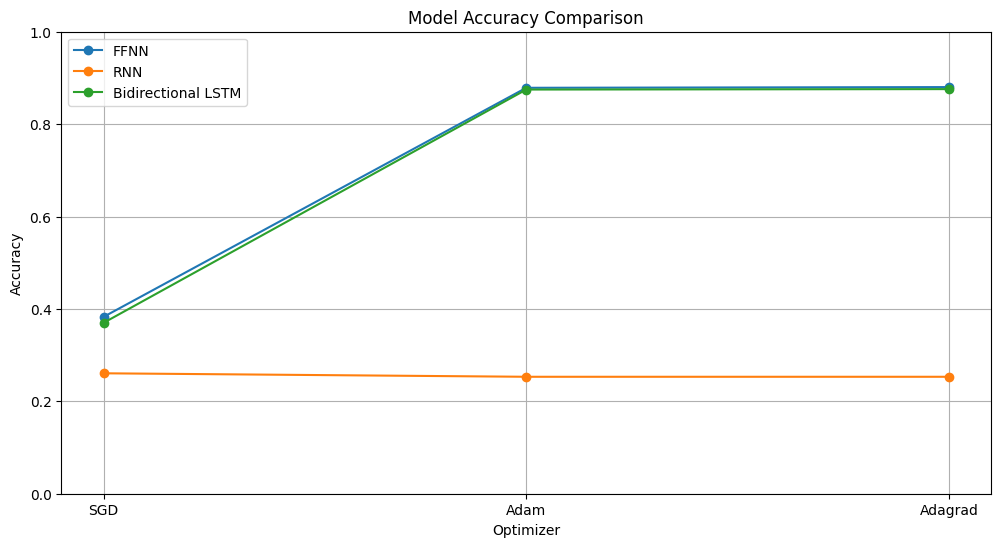

In [ ]:
# Visualization of Accuracy
plt.figure(figsize=(12, 6))
for model in results['Model'].unique():
    subset = results[results['Model'] == model]
    plt.plot(subset['Optimizer'], subset['Accuracy'], marker='o', label=model)

plt.title('Model Accuracy Comparison')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.ylim([0, 1])
plt.show()

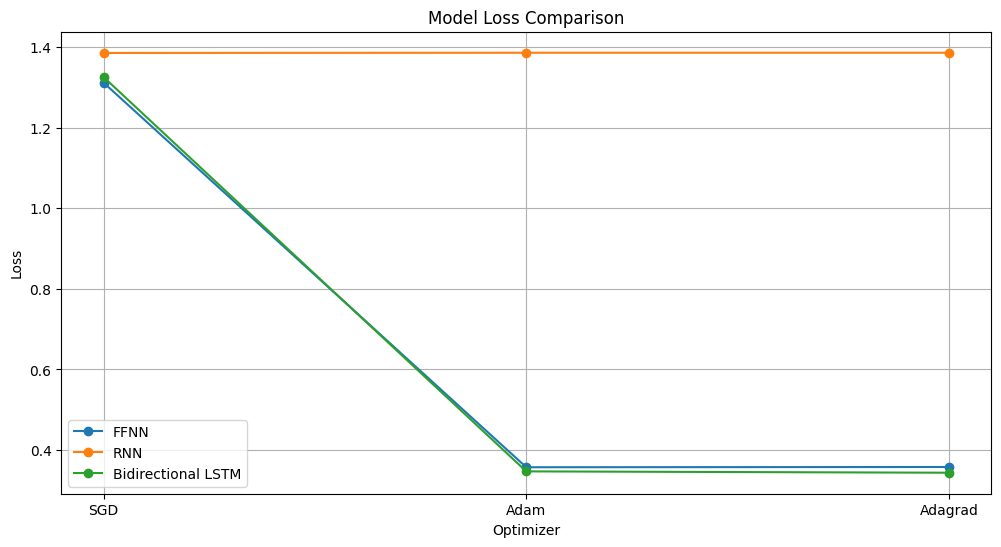

In [ ]:
# Visualization of Loss
plt.figure(figsize=(12, 6))
for model in results['Model'].unique():
    subset = results[results['Model'] == model]
    plt.plot(subset['Optimizer'], subset['Loss'], marker='o', label=model)

plt.title('Model Loss Comparison')
plt.xlabel('Optimizer')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()